# Лабораторная работа №3 Белоцкий Дмитрий

# Задание 1. 

Пусть матрица А является персимметрической матрицей.

1) задайте матрицу  и, используя теорему Гершгорина, определите расположение собственных чисел матрицы (графически).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

[[ 1.  5.  6. -2. -1. -7.  0.]
 [ 5.  1. -4. -5. -1.  4. -7.]
 [ 6. -4.  8.  8. -6. -1. -1.]
 [-2. -5.  8.  6.  8. -5. -2.]
 [-1. -1. -6.  8.  8. -4.  6.]
 [-7.  4. -1. -5. -4.  1.  5.]
 [ 0. -7. -1. -2.  6.  5.  1.]]


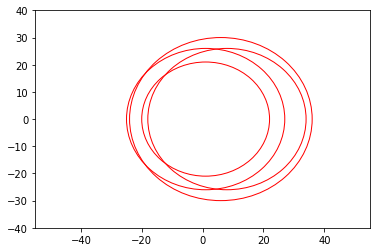

In [2]:
def persymmetric_matrix(n):
    A = np.zeros([n, n])
    for i in range(n//2 + 1):
        for j in range(i, n-i):
            A[i][j] = A[j][i] = A[n-i-1][n-j-1] = A[n-j-1][n-i-1] = np.random.randint(-9, 9)
    return A


def eigenvalues_location(A):
    location = []
    for i in range(np.shape(A)[0]//2+1):
        center = np.abs(A[i][i])
        radius = np.sum(np.abs(A[i]))-center
        location.append((center, radius))
    return location


#A = persymmetric_matrix(7)
A = np.array([[ 1.,  5.,  6., -2., -1., -7.,  0.],
                  [ 5.,  1., -4., -5., -1.,  4., -7.],
                  [ 6., -4.,  8.,  8., -6., -1., -1.],
                  [-2., -5.,  8.,  6.,  8., -5., -2.],
                  [-1., -1., -6.,  8. , 8. ,-4. , 6.],
                  [-7. , 4. ,-1., -5., -4. , 1. , 5.],
                  [ 0., -7., -1., -2.,  6.,  5.,  1.]])
location = eigenvalues_location(A)
fig, ax = plt.subplots()
plt.xlim(-55, 55)
plt.ylim(-40, 40)
for (center, radius) in location:
    ax.add_artist(plt.Circle((center, 0), radius, color='red', fill=False))
print(A)
plt.show()

2) напишите функцию, позволяющую определить манимальное и максимальное собтсвенное значение персимметрической матрицы, и исследуйте сходимость предложенного решения.

In [3]:
def find_max_eig(A):
    y = np.ones([np.shape(A)[0]])
    eps = 1e-7
    E = 1
    iteration = 0
    max_eig = 0
    A_prev = copy.copy(A)
    while E > eps:
        A_prev = np.dot(A, A_prev)
        A_next = np.dot(A, A_prev)
        y_prev = np.dot(A_prev, np.transpose(y))
        y_next = np.dot(A_next, np.transpose(y))
        max_eigs = [y1/y2 for y1, y2 in zip(y_next, y_prev) if y2 != 0]
        if max_eigs is []:
            return 0
        max_eig_next = np.sum(max_eigs)/len(max_eigs)
        E = np.abs(max_eig_next - max_eig)
        max_eig = max_eig_next
        iteration += 1
    print("Метод сошелся за {} итераций".format(iteration))
    return max_eig


print("максимальное собственное значение:   " + str(find_max_eig(A)))
print("проверка:  " + str(np.max(np.linalg.eig(A)[0]))+ '\n')
print("минимальное собственное значение:   " + str(1/find_max_eig(np.linalg.inv(A))))
print("проверка:  " + str(np.min(np.abs(np.linalg.eig(A)[0]))))

Метод сошелся за 29 итераций
максимальное собственное значение:   20.52940651926952
проверка:  20.529406545613448

Метод сошелся за 5 итераций
минимальное собственное значение:   0.07951843129443095
проверка:  0.0795184312908567


In [ ]:
3)Из соотношения Ax = lmbd * x следует что для матрицы A-4E собственные значения будут соответственно (lmbd-4).
Заданная в условии матрица положительно определена, следовательно все собственные значения матрицы положительны.
Используя теорему Гершгорина получим, что все значения находятся в интервале (0,4), таким образом собственные
значения матрицы A-4E будут лежать в интервале (-4,0). Тогда если минимальное собственное значение матрицы A равно
l, то модуль максимального значения матрицы A-4E будет (l-4), что и есть спектральный радиус.

# Задание 2.

In [4]:
def tridiagonal_matrix(alpha, n):
    A = np.zeros([n,n])
    for i in range(n - 1):
        A[i, i + 1] = -alpha
    for i in range(1, n):
        A[i, i - 1] = -alpha
    for i in range(n):
        A[i, i] = 1 + 2 * alpha
    return A


def Gram_Schmidt_method(matrix):
    def projection(u, a):
        return np.dot(u, a)/np.dot(u,u) * u
    A = np.copy(matrix)
    Q = np.empty(list(np.shape(A)))
    U = [A[:,0]]
    for i in range(1, np.shape(A)[0]):
        tempU = A[:,i]
        for j in range(0,i):
            tempU -= projection(U[j], A[:,i])
        U.append(tempU)
    for i in range(np.shape(A)[0]):
        Q[:,i] = U[i]/np.linalg.norm(U[i])
    return Q


def find_eigs(matrix):
    A = np.copy(matrix)
    eigs = np.ones([np.shape(A)[0]])
    eps = 1e-10
    E = 1
    iterations = 0
    while E > eps:
        Q = Gram_Schmidt_method(A)
        A = np.dot(np.dot(np.transpose(Q), A), Q)
        E = np.sqrt(np.sum([(i-j)**2 for i, j in zip(np.diag(A), eigs)]))
        eigs = np.diag(A)
        iterations+=1
    #print("сошелся за {} итераций".format(iterations))
    return eigs


def right_eigs(alpha,n):
    return [1+4*alpha*(np.sin(np.pi*i/(2*(n+1)))**2) for i in range(1,n+1)]


if __name__ == '__main__':
    A = tridiagonal_matrix(0.5, 5)
    print("СОБСТВЕННЫЕ ЗНАЧЕНИЯ МАТРИЦЫ")
    print("с помощью QR-разложения:    " + str(np.sort(find_eigs(A))))
    print("с помощью numpy:            " + str(np.sort(np.linalg.eig(A)[0])))
    print("точные значение по формуле: " + str(right_eigs(0.5, 5)))
    print("погрешность вычисления: " + 
          str(np.sqrt(np.sum([(i-j)**2 for i,j in zip(right_eigs(0.5, 5), np.sort(find_eigs(A)))]))))

СОБСТВЕННЫЕ ЗНАЧЕНИЯ МАТРИЦЫ
с помощью QR-разложения:    [1.1339746 1.5       2.        2.5       2.8660254]
с помощью numpy:            [1.1339746 1.5       2.        2.5       2.8660254]
точные значение по формуле: [1.1339745962155614, 1.5, 1.9999999999999998, 2.5, 2.866025403784439]
погрешность вычисления: 2.879907550904109e-10


In [ ]:
2)Спектральный радиус матрицы, обратной данной, будет меньше единицы, если милимальное собственное значение 
исходной матрицы будет больше 1, что выполняется при любых значениях M, однако при M -> inf, минимальное 
собственное значениестремится к 1, т.е спектральный радиус будет стремиться к 1, чем больше M, тем хуже метод 
сходится, но он все еще будет сходиться при любом достаточно большом M.

# Задание 3.

Необхимо найти определитель матрицы. Определитель матрицы равен произведению собственных векторов.

In [5]:
def det(matrix):
    eigs = find_eigs(matrix)
    det = 1
    for eig in eigs:
        det *= eig
    return det


print("используя собственные значения: " + str(np.linalg.det(A)))
print("используя numpy: " + str(det(A)))

используя собственные значения: 24.374999999999993
используя numpy: 24.375000000253603


# Задание 4.

In [6]:
import pandas as pd
data=pd.read_excel('/home/dimasiandro/Downloads/forPCAanalysis.xls')
print(data[:5])

   LP    nation   gender age  test1  test2  test3  test4  test5  test6  test7
0  Y1        Y2       Y3  Y4     X1     X2     X3     X4     X5     X6     X7
1   1  французы  женщина   6  77.14  65.71  82.86  82.86  85.71     20  77.14
2   2  французы  женщина   6  68.57  62.86     80  91.43  88.57  17.14  74.29
3   3  французы  мужчина   6  74.29  62.86     80  85.71  82.86  22.86  68.57
4   4  французы  женщина   6  71.43  65.71  82.86  88.57  91.43  14.29  77.14


In [ ]:
Ипользуем метод главных компонент для результатов 7 тестов (столбцов X1 - X7)
    1)Сначала получим стандартизированную матрицу, для этого:
        a) Вычислим среднее значения для каждого из столбцов, затем вычтем его (таким образом среднее значение 
            каждого столбца будет равно 0)
        b) Далее каждый столбец нужно поделить на корень из суммы квадратов всех элементов соответствующего
            столбца (таким образом стандартное отклонение для каждого столбца будет равно 1)
    2)Получим ковариационную матрицу: умножим получившуюсь матрицу на ее транспонирование так,
        чтобы получилась матрица размером 7x7
    3)Для полученной матрицы вычислим собственные значения и собственные векторы методом вращений (метод Якоби).

In [2]:
import pandas as pd
import math
import numpy as np
import copy


def PCA(l):
    def rotation_method(symmetric_matrix):
        def max_value(a):
            n = len(a)
            max = 0.0
            for i in range(n - 1):
                for j in range(i + 1, n):
                    if abs(a[i, j]) >= max:
                        max = abs(a[i, j])
                        x = i;
                        y = j
            return max, x, y

        A = np.copy(symmetric_matrix)
        eig_vecs = np.eye(np.shape(A)[0])
        m = 1
        while np.abs(m) > 1e-16:
            m, i1, j1 = max_value(A)
            alpha = (A[j1, j1] - A[i1, i1]) / (2 * A[i1, j1])
            t = np.sign(alpha) / (np.abs(alpha) + np.sqrt(1 + alpha ** 2))
            c = 1 / (np.sqrt(1 + t * t))
            s = t / (np.sqrt(1 + t * t))
            Q = np.eye(np.shape(A)[0])
            Q[i1, i1] = c
            Q[j1, j1] = c
            Q[i1, j1] = -s
            Q[j1, i1] = s
            A = np.dot(np.dot(Q, A), np.transpose(Q))
            A[i1, j1] = A[j1, i1] = 0
            eig_vecs = np.dot(eig_vecs, np.transpose(Q))
        eig_vals = [A[i][i] for i in range(np.shape(A)[0])]
        return eig_vecs, eig_vals

    list_x = copy.copy(l)
    for x in list_x:
        mean = 0
        for i in range(1,643):
            mean += x[i]
        mean /= 642
        for i in range(1,643):
            x[i] -= mean
        deviation = 0
        for i in range(1,643):
            deviation += x[i]**2
        deviation = math.sqrt(deviation)
        for i in range(1,643):
            x[i] /= deviation
    z = np.zeros([7, 642])
    i = 0
    for x in list_x:
        z[:][i] = x[1:]
        i += 1
    # получили стандартизированную матрицу z
    cov_matrix = np.dot(z, np.transpose(z))
    # получили ковариационную матрицу
    eig_vecs, eig_vals = rotation_method(cov_matrix)
    # получили собственные векторы и собственные значения
    main_components = []
    sum_eig_vals = 0
    for i in range(np.shape(eig_vals)[0]):
        sum_eig_vals += eig_vals[i]
    for i in range(np.shape(eig_vals)[0]):
        if abs(eig_vals[i]) > 1:
            main_components.append((eig_vals[i]/sum_eig_vals, eig_vecs[:, i]))
    main_components = sorted(main_components, reverse=True)
    return list(zip(*main_components)), z


data=pd.read_excel('/home/dimasiandro/Downloads/forPCAanalysis.xls')
print(data[:5])
list_x = [data['test1'], data['test2'], data['test3'], data['test4'], data['test5'], data['test6'], data['test7']]
nation = data['nation']
gender = data['gender']
age = data['age']

main_components, z = PCA(list_x)
print("Собственные векторы главных компонент: " + str(main_components[1]))
print("Важности главных комопонент " + str(main_components[0]))

   LP    nation   gender age  test1  test2  test3  test4  test5  test6  test7
0  Y1        Y2       Y3  Y4     X1     X2     X3     X4     X5     X6     X7
1   1  французы  женщина   6  77.14  65.71  82.86  82.86  85.71     20  77.14
2   2  французы  женщина   6  68.57  62.86     80  91.43  88.57  17.14  74.29
3   3  французы  мужчина   6  74.29  62.86     80  85.71  82.86  22.86  68.57
4   4  французы  женщина   6  71.43  65.71  82.86  88.57  91.43  14.29  77.14
Собственные векторы главных компонент: (array([-0.14272572,  0.053266  ,  0.48043425,  0.48284147,  0.49637828,
       -0.49637791,  0.14162177]), array([ 0.50565118, -0.57061043,  0.06744052,  0.13077259,  0.09488891,
       -0.09491339, -0.61567725]))
Важности главных комопонент (0.5676971835423347, 0.24443571360340893)


In [ ]:
Первые 2 компонеты являются основными и формируют 80% от исходным 7 аргументов. В зависимости от пола, возраста и
национальности значения этих двух компонент будут являтся определеяющими для общего результата всех тестов. По 
координатам собственных векторов можно отследить участие каждой из изначальных переменных в главных компонентах,
так например чем выше окажутся значения 3-5 тестов тем выше окажется и значение главной компаненты. Чем выше 
окажется значения первого теста, тем ниже окажется значение 1 компаненты, но при это значительно увеличится 
значение 2 компаненты. В зависимости от того, что каждый из психологических тестов показывает, можем сделать
вывод о том, на какие характеристики человека на самом деле указывают полученные нами компоненты.

In [3]:
def check_importance(nation, nation_string, component_matrix_copy, matrix_z):
    component_matrix = np.copy(component_matrix_copy)
    counter = 0
    for i in range(np.shape(matrix_z)[1]):
        if nation[i] == nation_string:
            counter += 1
    z = np.zeros([7, counter])
    j = 0
    for i in range(np.shape(matrix_z)[1]):
        if nation[i] == nation_string:
            z[:, j] = matrix_z[:, i]
            j += 1
    P = np.dot(np.transpose(component_matrix), z)
    component_values = []
    print(nation_string + ": ")
    for i in range(np.shape(P)[0]):
        mean = 0
        for j in range(np.shape(P)[1]):
            mean += P[i][j]
        mean /= np.shape(P)[1]
        print("   "+ str(i+1) + "компонента: " + str(mean))
        component_values.append(mean)
    return component_values


def check_importance_age(nation, num1, num2, component_matrix_copy, matrix_z):
    component_matrix = np.copy(component_matrix_copy)
    counter = 0
    for i in range(1,np.shape(matrix_z)[1]):
        if num1 <= int(nation[i]) <= num2:
            counter += 1
    z = np.zeros([7, counter])
    j = 0
    for i in range(1,np.shape(matrix_z)[1]):
        if num1 <= int(nation[i]) <= num2:
            z[:, j] = matrix_z[:, i]
            j += 1
    P = np.dot(np.transpose(component_matrix), z)
    component_values = []
    print("Возраст {} - {} : ".format(num1,num2) + ": ")
    for i in range(np.shape(P)[0]):
        mean = 0
        for j in range(np.shape(P)[1]):
            mean += P[i][j]
        mean /= np.shape(P)[1]
        print("   "+ str(i+1) + "компонента: " + str(mean))
        component_values.append(mean)
    return component_values

component_matrix = np.empty([7, 2])
for i in range(np.shape(main_components[1])[0]):
    component_matrix[:,i] = main_components[1][i]

importance_1 = check_importance(nation, 'французы', component_matrix, z)
importance_2 = check_importance(nation, 'китайцы', component_matrix, z)

importance_3 = check_importance(gender, 'мужчина', component_matrix, z)
importance_4 = check_importance(gender, 'женщина', component_matrix, z)

importance_5 = check_importance_age(age, 6, 18 , component_matrix, z)
importance_6 = check_importance_age(age, 19, 30 , component_matrix, z)

французы: 
   1компонента: 0.0065799823463664085
   2компонента: -0.004819040419095411
китайцы: 
   1компонента: -0.0038006403941380023
   2компонента: 0.0027540163138463527
мужчина: 
   1компонента: 0.0007262736957380026
   2компонента: 0.001105901429505904
женщина: 
   1компонента: -0.0006903445830684352
   2компонента: -0.0009705812036706476
Возраст 6 - 18 : : 
   1компонента: -0.0021577827236407155
   2компонента: -0.0017671421286074621
Возраст 19 - 30 : : 
   1компонента: 0.005645722029209356
   2компонента: 0.004710231259035176


In [ ]:
Вывод: по полученным соотношениям компонент, которые между собой являются очевидно независимыми, мы можем сделать
    вывод, что результаты сильно зависят от национальности (показатель 1 характеристики у французов выше, однако
    по 2 характеристике выше наоборот китайцы(на 2 характеристику преимущественно влияют 1 и 7 тесты)).С полом
    людей ситуация более очевидная, значения обеих компонент у мужчин оказались выше. Люди в возрасте 19-30 лет
    в общем с психологическими тестами справились значительно лучше, чем люди в возрасте 6-18 лет